In [1]:
pip install lasio

In [2]:
import lasio
import pandas as pd
import os

# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls /content/data

Data


In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/2024_Geohackathon/Data.zip"  # Path to your ZIP file
extract_path = "/content/data"  # Directory to extract the files to

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [6]:
# Path to the extracted data
base_path = "/content/data/Data/Wells/LAS and Reports"

# Dictionary to store DataFrames for each well
well_data = {}

# Function to load LAS files for each well separately
def load_las_data_per_well(base_path):
    for well_folder in os.listdir(base_path):
        well_path = os.path.join(base_path, well_folder)
        if os.path.isdir(well_path):  # Check if it's a directory (a well folder)
            print(f"Processing well: {well_folder}")

            # Check for nested 'Las_files' folder
            nested_folder = os.path.join(well_path, "Las_files")
            if os.path.exists(nested_folder) and os.path.isdir(nested_folder):
                las_files = [f for f in os.listdir(nested_folder) if f.lower().endswith(".las")]

                # Read each LAS file for this well
                well_logs = []
                for las_file in las_files:
                    las_file_path = os.path.join(nested_folder, las_file)
                    try:
                        las = lasio.read(las_file_path)  # Read LAS file
                        las_df = las.df()  # Convert LAS data to a DataFrame
                        las_df['File'] = las_file  # Add file name for traceability
                        well_logs.append(las_df)  # Append DataFrame to list
                        print(f"Successfully loaded: {las_file}")
                    except Exception as e:
                        print(f"Error reading {las_file_path}: {e}")

                # Combine all logs for this well into a single DataFrame
                if well_logs:
                    well_data[well_folder] = pd.concat(well_logs, ignore_index=True)

    return well_data

# Load LAS data for each well
well_data = load_las_data_per_well(base_path)

# Example: Accessing data for a specific well
for well, df in well_data.items():
    print(f"\nWell: {well}")
    print(df.head())  # Display first few rows of the DataFrame for each well


Processing well: Virovitica-1
Successfully loaded: Vir-1_EDIT.las
Successfully loaded: Vir-1_ismx_las_raw_digitalizacija.las
Successfully loaded: Vir-1_tx_las_raw_digitalizacija.las
Successfully loaded: Vir-1_shry_las_raw_digitalizacija.las
Successfully loaded: Vir-1_wrsh_las_raw_digitalizacija.las
Successfully loaded: Vir-1_ism_las_raw_digitalizacija.las
Successfully loaded: Vir-1_shrz_las_raw_digitalizacija.las
Successfully loaded: Vir-1_wrs_las_raw_digitalizacija.las
Successfully loaded: Vir-1_cal_las_raw_digitalizacija.las
Successfully loaded: Vir-1_shr_las_raw_digitalizacija.las
Successfully loaded: Vir-1_t_las_raw_digitalizacija.las
Successfully loaded: Vir-1_calx_las_raw_digitalizacija.las
Processing well: Virovitica_3 Alfa
Successfully loaded: Vir-3_raw_wds.las
Successfully loaded: Vir-3_HIM003_TAP_55_ANALIZA_IBM_TRAKE.las
Successfully loaded: Vir-3_HIM003_TAP_54_ANALIZA_IBM_TRAKE.las
Successfully loaded: Vir-3_HIM003_TAP_57_RAW_IBM_TRAKE.las
Successfully loaded: Vir-3_HIM003_T

Successfully loaded: ReK-1_PetroAnaliza.las
Successfully loaded: ReK-1_elc_las_raw_digitalizacija.las
Successfully loaded: ReK-1_elb_las_raw_digitalizacija.las
Successfully loaded: ReK-1_mcl_las_raw_digitalizacija.las
Successfully loaded: ReK-1_ml1_las_raw_digitalizacija.las
Successfully loaded: ReK-1_cdcn_las_raw_digitalizacija.las
Successfully loaded: ReK-1_dlgs_las_raw_digitalizacija.las
Successfully loaded: ReK-1_ml_las_raw_digitalizacija.las
Successfully loaded: ReK-1_el_las_raw_digitalizacija.las
Successfully loaded: ReK-1_bhca_las_raw_digitalizacija.las
Successfully loaded: ReK-1_ll_las_raw_digitalizacija.las
Successfully loaded: ReK-1_bhc_las_raw_digitalizacija.las

Well: Virovitica-1
     CAL1  CAL2  R16  R64  RLML  RNML  SPT            File  RT  SP  TEMP  CAL
0  12.867   NaN  NaN  NaN   NaN   NaN  NaN  Vir-1_EDIT.las NaN NaN   NaN  NaN
1  12.867   NaN  NaN  NaN   NaN   NaN  NaN  Vir-1_EDIT.las NaN NaN   NaN  NaN
2  12.867   NaN  NaN  NaN   NaN   NaN  NaN  Vir-1_EDIT.las NaN N

In [7]:
well_A_log = well_data['Lončarica-1']  # Replace with the desired well name
print(well_A_log.head())


      LL                                  File  CAL  RLML  RNML  RT  SP  AC  \
0  6.737  Lon-1_ll1_las_raw_digitalizacija.las  NaN   NaN   NaN NaN NaN NaN   
1  6.936  Lon-1_ll1_las_raw_digitalizacija.las  NaN   NaN   NaN NaN NaN NaN   
2  6.537  Lon-1_ll1_las_raw_digitalizacija.las  NaN   NaN   NaN NaN NaN NaN   
3  5.739  Lon-1_ll1_las_raw_digitalizacija.las  NaN   NaN   NaN NaN NaN NaN   
4  5.739  Lon-1_ll1_las_raw_digitalizacija.las  NaN   NaN   NaN NaN NaN NaN   

   TEMP  R16  R64  
0   NaN  NaN  NaN  
1   NaN  NaN  NaN  
2   NaN  NaN  NaN  
3   NaN  NaN  NaN  
4   NaN  NaN  NaN  


In [8]:
# Combine all wells into a single DataFrame for whole dataset analysis
all_wells_data = pd.concat(well_data.values(), ignore_index=True)

In [9]:
# Function for basic statistics
def basic_statistics(data, well_name=None):
    print(f"\n{'='*20} Basic Statistics {'='*20}")
    if well_name:
        print(f"Statistics for Well: {well_name}")
    print(data.describe())

# EDA for each well
for well, df in well_data.items():
    basic_statistics(df, well_name=well)

# EDA for the whole dataset
basic_statistics(all_wells_data, well_name="All Wells Combined")



==================== Basic Statistics ====================
Statistics for Well: Virovitica-1
              CAL1          CAL2           R16           R64          RLML  \
count  5901.000000  19951.000000  57004.000000  57000.000000  39733.000000   
mean     11.604308     10.581442     19.202887     29.595373      5.202517   
std       0.446493      1.099927     13.717968     31.967450      4.262280   
min       9.781700      8.524000      0.170000     -0.083000     -0.580000   
25%      11.369000      9.473850     11.457225     14.379600      2.503000   
50%      11.495000     10.508300     15.248150     20.207150      3.378000   
75%      11.671000     11.444000     21.039075     28.636000      6.788900   
max      14.058700     14.578700     93.131000    231.627000     34.657000   

               RNML           SPT           RT            SP          TEMP  \
count  39733.000000  28263.000000  9352.000000  38005.000000  19902.000000   
mean       5.800397     56.893811    74.049108 

In [10]:
# Ensure the 'Well' column is added to each well's DataFrame
for well, df in well_data.items():
    df['Well'] = well  # Add well name to each DataFrame

# Concatenate all wells into a single DataFrame
all_wells_data = pd.concat(well_data.values(), ignore_index=True)



In [11]:
print(all_wells_data['GR'].isnull().sum())  # Count missing GR values


574000


<ipython-input-13-cb5414bbd7b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_wells_data, x="Well", y="GR", palette="Set2")


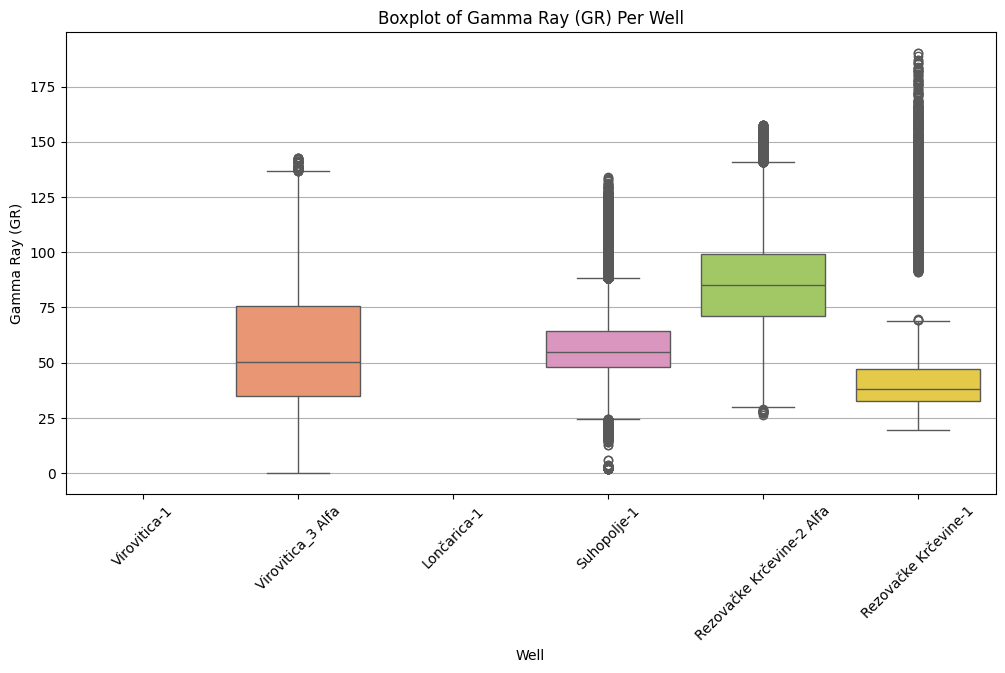

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_wells_data, x="Well", y="GR", palette="Set2")
plt.title("Boxplot of Gamma Ray (GR) Per Well")
plt.xlabel("Well")
plt.ylabel("Gamma Ray (GR)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()



In [14]:
def check_well_log_availability(well_data, log_name):
    valid_wells = {}
    for well, df in well_data.items():
        if log_name in df.columns:
            non_nan_count = df[log_name].notnull().sum()
            if non_nan_count > 0:
                valid_wells[well] = df  # Only include wells with valid data
    return valid_wells


In [15]:
# Function for KDE Plots
def kde_plot_log(well_data, log_name, title="KDE Plot"):
    plt.figure(figsize=(12, 6))
    for well, df in well_data.items():
        if log_name in df.columns and df[log_name].notnull().sum() > 0:
            sns.kdeplot(df[log_name], label=well, fill=True, alpha=0.5)
    plt.title(title)
    plt.xlabel(log_name)
    plt.ylabel("Density")
    plt.legend(title="Well")
    plt.grid()
    plt.show()

In [16]:

# Function for Scatterplots (Crossplot)
def scatterplot_logs(data, log_x, log_y, title="Scatterplot", group_by=None):
    plt.figure(figsize=(10, 6))
    if group_by:
        sns.scatterplot(data=data, x=log_x, y=log_y, hue=group_by, palette="Set2", alpha=0.7)
    else:
        sns.scatterplot(data=data, x=log_x, y=log_y, alpha=0.7)
    plt.title(title)
    plt.xlabel(log_x)
    plt.ylabel(log_y)
    plt.grid()
    plt.show()

In [17]:

# Combine all wells into a single dataset for combined analysis
def combine_well_data(well_data, log_name):
    combined_data = []
    for well, df in well_data.items():
        if log_name in df.columns and df[log_name].notnull().sum() > 0:
            df['Well'] = well
            combined_data.append(df)
    return pd.concat(combined_data, ignore_index=True)


In [19]:

# Perform EDA
log_name = "GR"  # Example: Gamma Ray

# Step 1: Check wells with valid 'GR' data
valid_wells_data = check_well_log_availability(well_data, log_name)


In [20]:
# Step 3: Combine data for visualization
combined_data = combine_well_data(valid_wells_data, log_name)


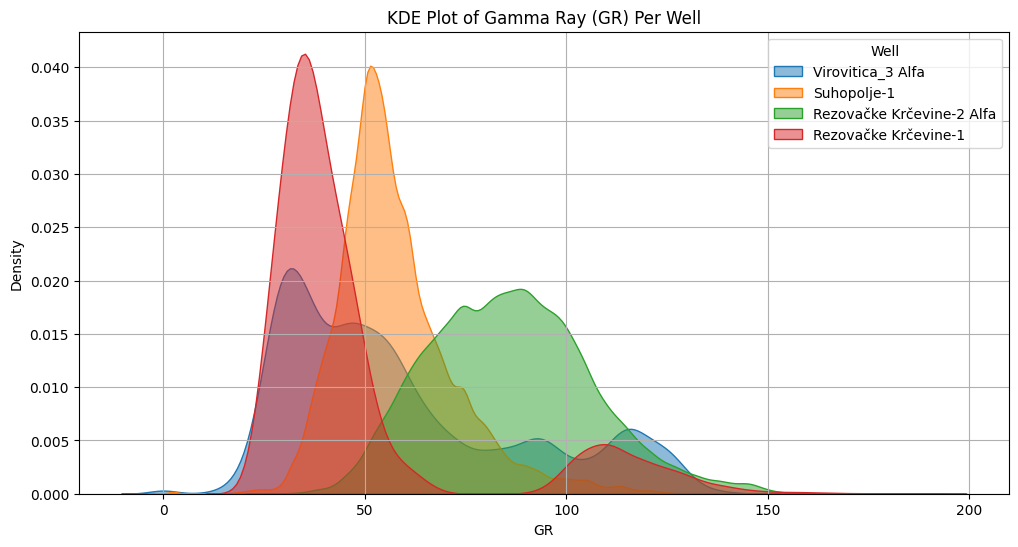

In [21]:
# KDE Plot for GR
kde_plot_log(valid_wells_data, log_name, title="KDE Plot of Gamma Ray (GR) Per Well")


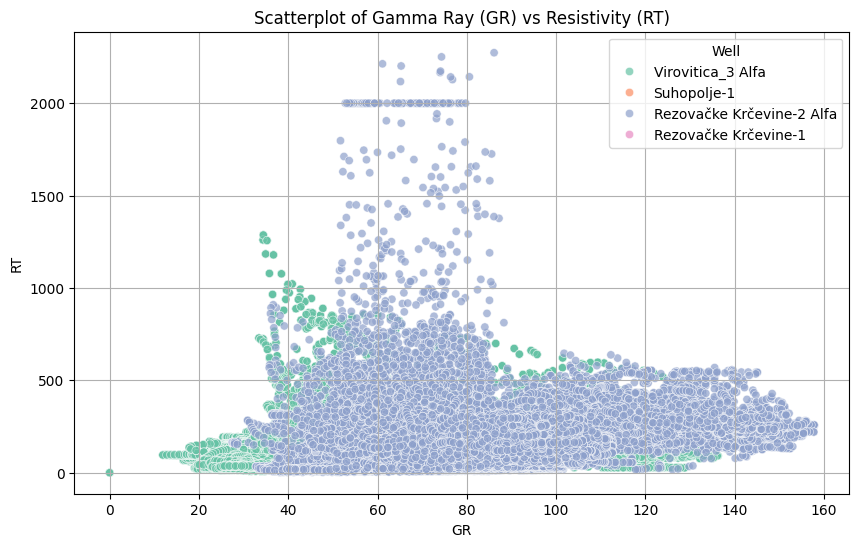

In [22]:

# Example Scatterplot: GR vs RT (if RT is another log available in the dataset)
if "RT" in combined_data.columns:
    scatterplot_logs(combined_data, log_x="GR", log_y="RT", title="Scatterplot of Gamma Ray (GR) vs Resistivity (RT)", group_by="Well")

In [23]:
# Select only numeric columns for correlation
numeric_data = all_wells_data.select_dtypes(include=['float64', 'int64'])

# Check the filtered data
print(numeric_data.columns)


Index(['CAL1', 'CAL2', 'R16', 'R64', 'RLML', 'RNML', 'SPT', 'RT', 'SP', 'TEMP',
       'CAL', 'AC', 'CN', 'DEN', 'GR', 'C1', 'CALC', 'HF', 'M', 'N', 'PERM',
       'PF', 'POR', 'PORT', 'PORW', 'SAND', 'SH', 'SW', 'C2', 'DOLO', 'LIME',
       'LL', 'RD', 'RS', 'CORR', 'BS', 'GRAC', 'GRDL', 'SPDL', 'CALA', 'GRML',
       'CALD', 'GRDN', 'NEU', 'RFOC', 'RILD', 'RILM', 'RMLL', 'BVW', 'DST',
       'DTMA', 'PAYH', 'PAYPHIH', 'PAYPHISOH', 'PAYVCLH', 'PHIE', 'PHIFLAG',
       'PHISEC', 'PHISECU', 'PHIT', 'RESFLAG', 'RESH', 'RESPHIH', 'RESPHISOH',
       'RESVCLH', 'SP1', 'SWU', 'VCL', 'VCLAV', 'VCLGR', 'VCLR', 'VCLSP',
       'VCOAL', 'VDCL', 'VDOL', 'VLIME', 'VSALT', 'VSAND', 'VSILT', 'VWCL',
       'PL'],
      dtype='object')


In [24]:
# Check for missing values
print(numeric_data.isnull().sum())

# Fill missing values (example: with the mean of each column)
numeric_data = numeric_data.fillna(numeric_data.mean())


CAL1     963605
CAL2     949555
R16      799890
R64      775994
RLML     761235
          ...  
VSALT    951355
VSAND    951355
VSILT    951355
VWCL     951355
PL       967205
Length: 81, dtype: int64


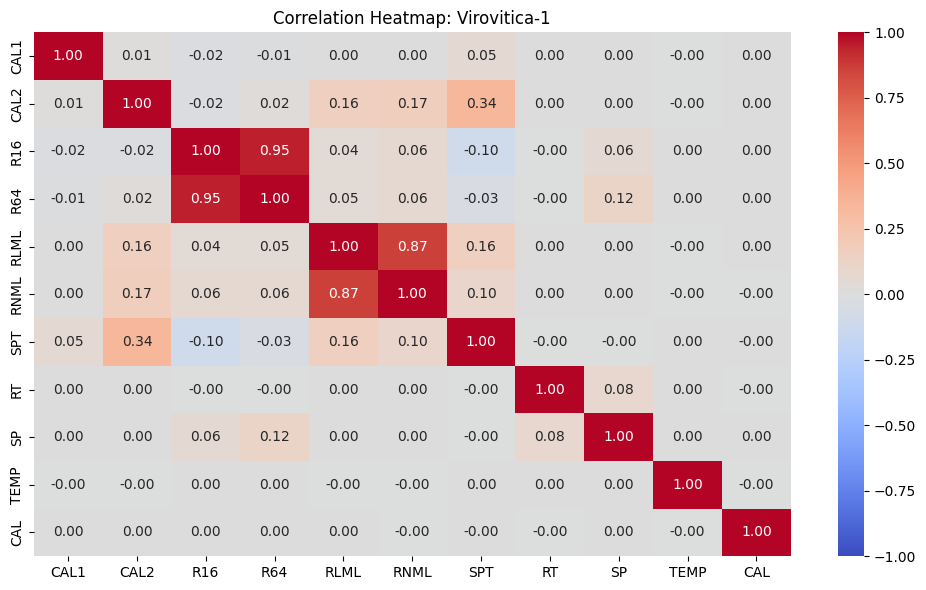

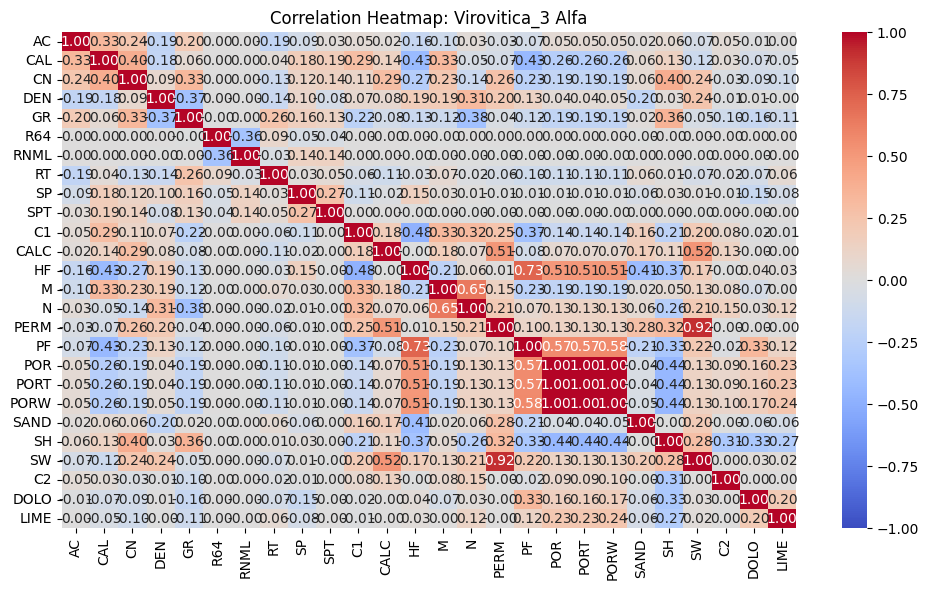

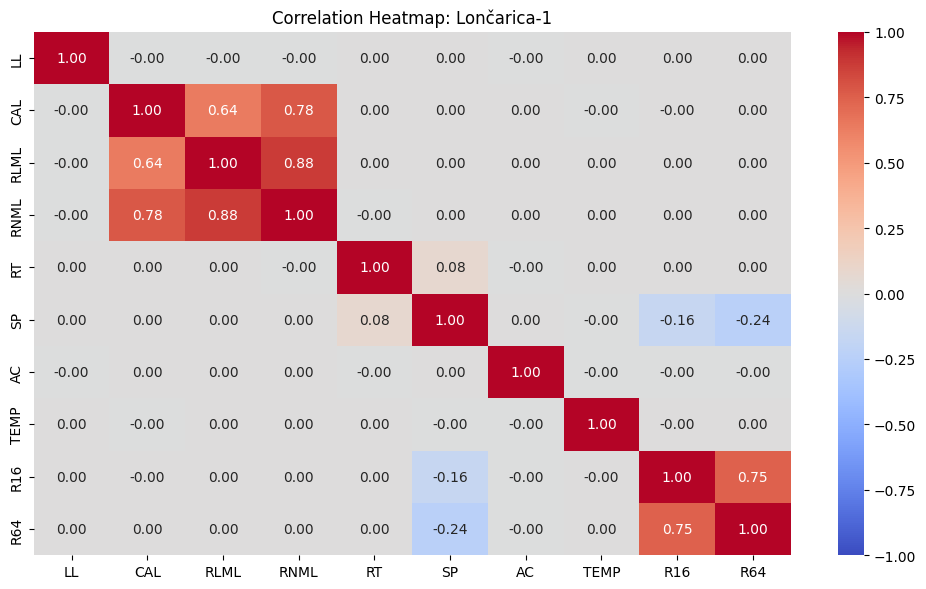

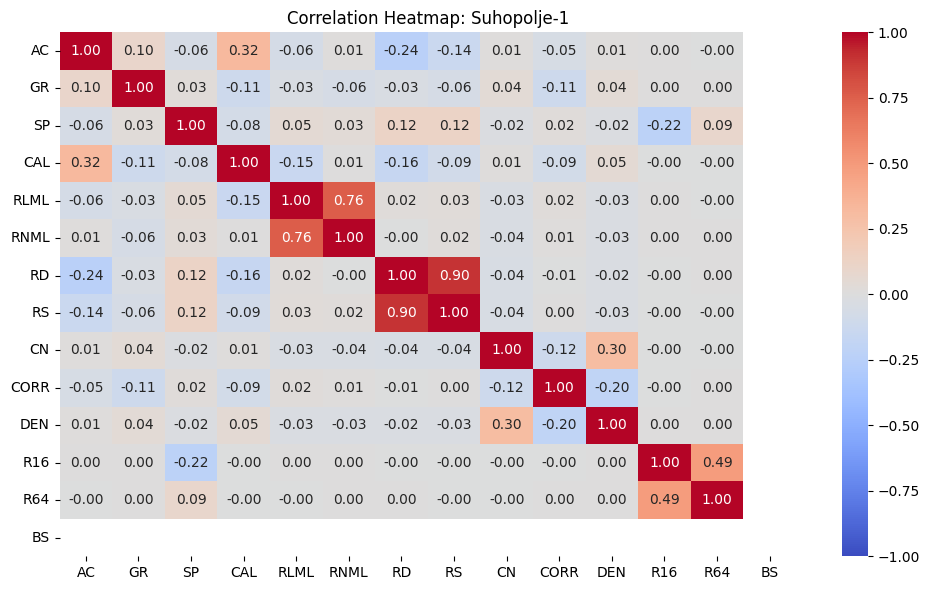

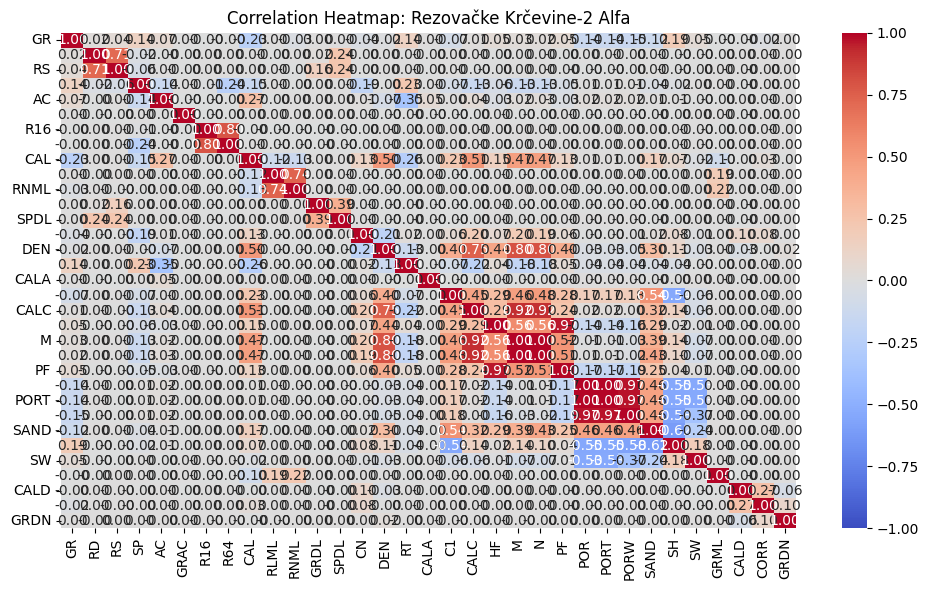

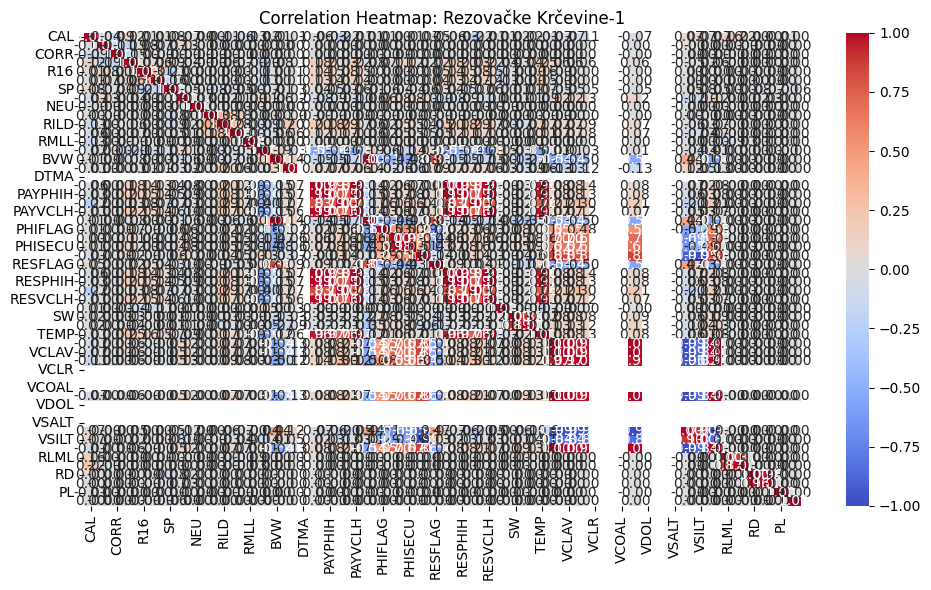

In [25]:

# Function to plot correlation heatmap for each well
def plot_correlation_heatmap_per_well(well_data):
    for well, df in well_data.items():
        # Select only numeric columns
        numeric_data = df.select_dtypes(include=['float64', 'int64'])

        # Check if numeric data exists
        if numeric_data.empty:
            print(f"Skipping well {well} as it has no numeric data.")
            continue

        # Handle missing values (fill or drop)
        numeric_data = numeric_data.fillna(numeric_data.mean())  # Fill missing values with column mean

        # Compute correlation matrix
        correlation_matrix = numeric_data.corr()

        # Plot the heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
        plt.title(f"Correlation Heatmap: {well}")
        plt.tight_layout()
        plt.show()

# Call the function for the well data dictionary
plot_correlation_heatmap_per_well(well_data)


In [27]:
print(all_wells_data.columns)
print(all_wells_data['TEMP'].isnull().sum())  # Count missing values
print(all_wells_data['TEMP'].notnull().sum())  # Count valid values


Index(['CAL1', 'CAL2', 'R16', 'R64', 'RLML', 'RNML', 'SPT', 'File', 'RT', 'SP',
       'TEMP', 'CAL', 'Well', 'AC', 'CN', 'DEN', 'GR', 'C1', 'CALC', 'HF', 'M',
       'N', 'PERM', 'PF', 'POR', 'PORT', 'PORW', 'SAND', 'SH', 'SW', 'C2',
       'DOLO', 'LIME', 'LL', 'RD', 'RS', 'CORR', 'BS', 'GRAC', 'GRDL', 'SPDL',
       'CALA', 'GRML', 'CALD', 'GRDN', 'NEU', 'RFOC', 'RILD', 'RILM', 'RMLL',
       'BVW', 'DST', 'DTMA', 'PAYH', 'PAYPHIH', 'PAYPHISOH', 'PAYVCLH', 'PHIE',
       'PHIFLAG', 'PHISEC', 'PHISECU', 'PHIT', 'RESFLAG', 'RESH', 'RESPHIH',
       'RESPHISOH', 'RESVCLH', 'SP1', 'SWU', 'VCL', 'VCLAV', 'VCLGR', 'VCLR',
       'VCLSP', 'VCOAL', 'VDCL', 'VDOL', 'VLIME', 'VSALT', 'VSAND', 'VSILT',
       'VWCL', 'PL'],
      dtype='object')
901001
68505


In [28]:
valid_temp_data = all_wells_data.dropna(subset=['TEMP'])


In [29]:
all_wells_data['TEMP'] = all_wells_data['TEMP'].fillna(all_wells_data['TEMP'].mean())


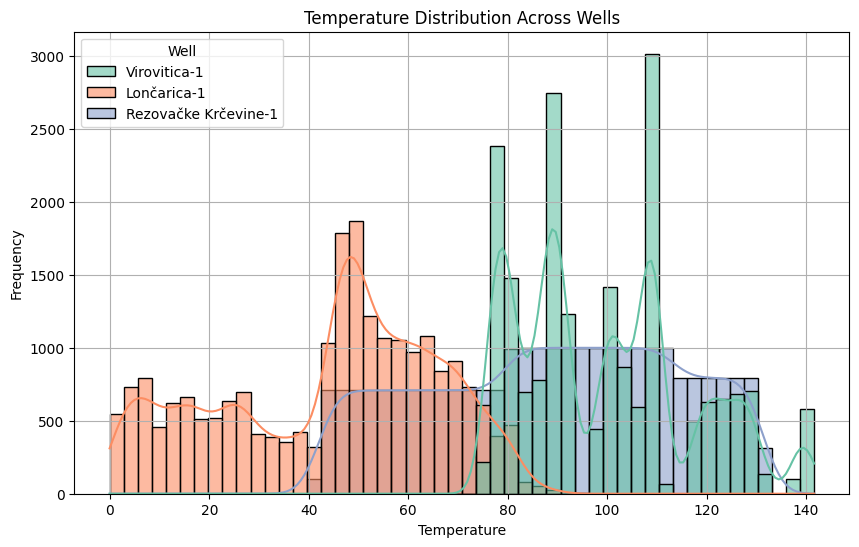

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_temp_data, x="TEMP", hue="Well", bins=50, kde=True, palette="Set2", alpha=0.6)
plt.title("Temperature Distribution Across Wells")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid()
plt.show()
